# SLR : Y = m*X + c
# MLR : Y = m1*X1 + m2*X2 + m3* X3........+mn*Xn + c

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # sits on matplot library

%matplotlib inline

In [3]:
# Load the dataset and extract independent and dependent variables
Dset = pd.read_csv('iris.csv')

print(Dset.head(n=2))
print('')
print(Dset.shape)

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa

(150, 5)


<AxesSubplot:>

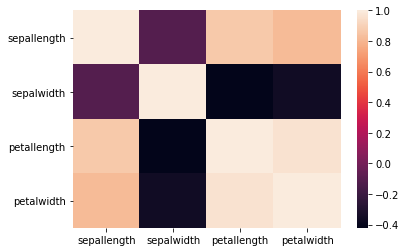

In [4]:
# Visualizing the data by building a correlation or scatterplot matrix
sns.heatmap(Dset.corr())

In [5]:
X1 = Dset.drop(columns = 'class').values # Now a numpy array
#X = Dset.iloc[:, :-1].values # values from all rows and all but the last column

# X = Dset.drop(columns = 'Profit') or
# X = Dset.drop('profit', axis = 1) or
# X = Dset.columns[:-1] # all but the last column


print(X1)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
# y = Dset.iloc[:, 4].values
y = Dset['class'].values

print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [11]:
# Encoding categorical features i.e the state column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # initializing the class
# Dset[:, 4] = le.fit_transform(Dset[:, 4]) # to encode all rows but the 5th column
le.fit(y)

y = le.transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 0)

In [20]:
# Fitting Multiple Linear Regression to the Training set from a test-train split
from sklearn.linear_model import LinearRegression
model = LinearRegression() # Initialize
model.fit(X1_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X1_test)

y_pred

array([ 2.07863376,  0.96669898, -0.15934059,  1.82209546, -0.03128655,
        2.29167009, -0.03326614,  1.30556458,  1.26630691,  1.10590682,
        1.61291114,  1.29882172,  1.24583575,  1.31726102,  1.35560867,
       -0.06446882,  1.37252277,  1.26780932,  0.03810685, -0.05301757,
        1.83345137,  1.43872911,  0.11461187,  0.05223725,  1.59172014,
       -0.1067769 ,  0.16770375,  1.17090695,  0.93927314,  0.10832465,
        1.74781133,  1.47276913, -0.06720024,  1.6329574 ,  2.00469015,
        1.28881924, -0.04616879,  1.59988104,  1.30377528,  1.10489089,
        1.84907488, -0.03240839,  1.82996938,  0.21809757, -0.1049876 ])

In [22]:
# calculating the Coefficients or partial slopes
print(model.coef_)

print('')

# calculating the Intercept
print(model.intercept_)

[-0.17020006 -0.01873675  0.27964604  0.55823298]

0.35230303668110596


In [23]:
# Calculating the R squared value, i.e the value of variation explained by the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8999447180621178